In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Step 1: Load data and explore data

In [2]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
breast_cancer_dataset_data = breast_cancer_dataset["data"]
breast_cancer_dataset_labels = breast_cancer_dataset["target"]
breast_cancer_dataset_features = breast_cancer_dataset["feature_names"]
print(breast_cancer_dataset_data.shape)
print(breast_cancer_dataset_labels.shape)
print(breast_cancer_dataset_features)

(569, 30)
(569,)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# Concatenate columns into a DF

df = pd.DataFrame(breast_cancer_dataset_data, columns=breast_cancer_dataset_features)
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# show any missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

#### There seems to be no missing values in our dataset. Let's look at the distributions of the data points for each of the features

In [6]:
### ignore depreciated warnings
import warnings
warnings.filterwarnings('ignore')

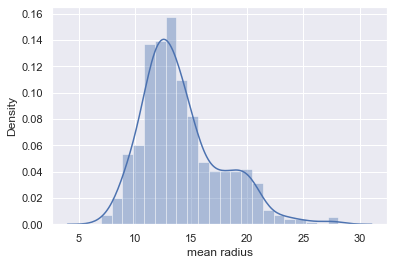

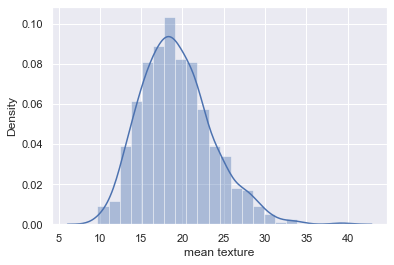

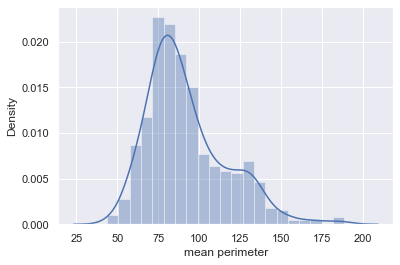

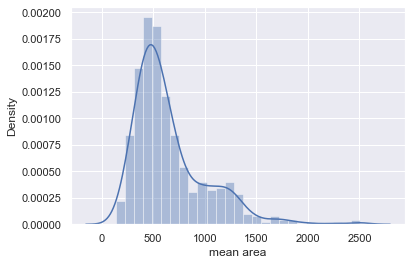

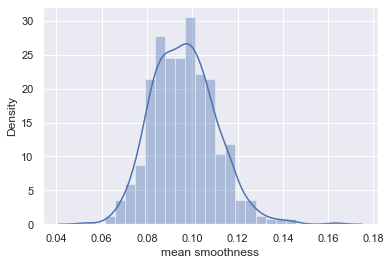

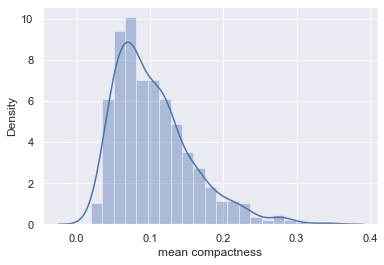

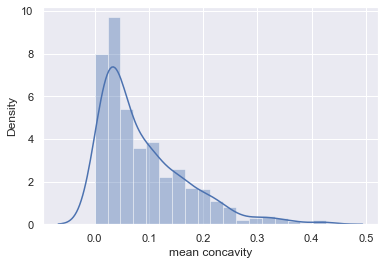

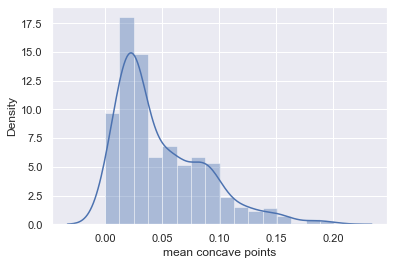

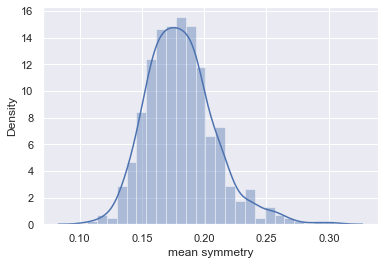

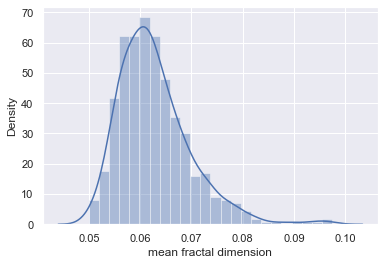

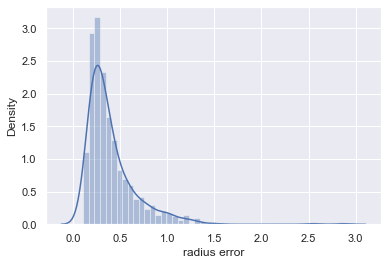

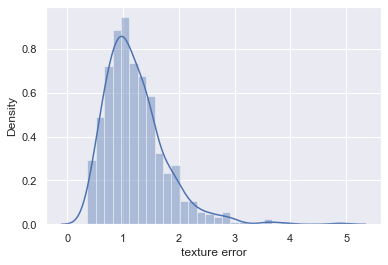

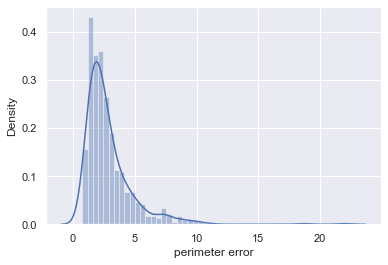

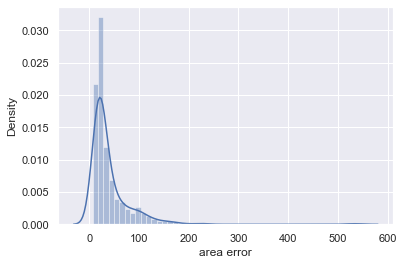

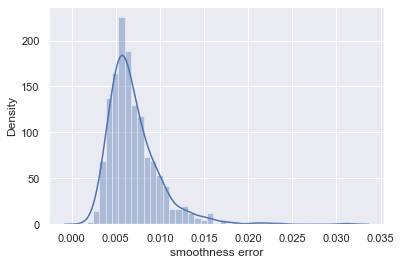

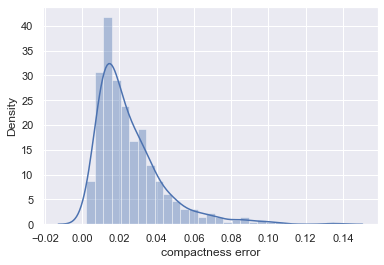

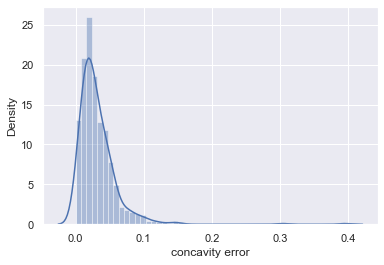

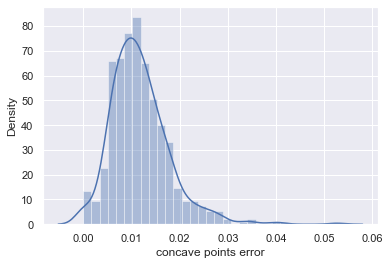

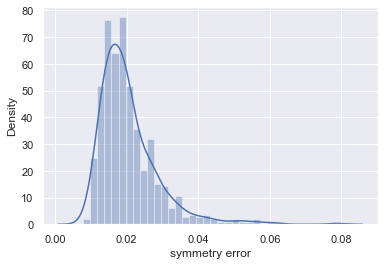

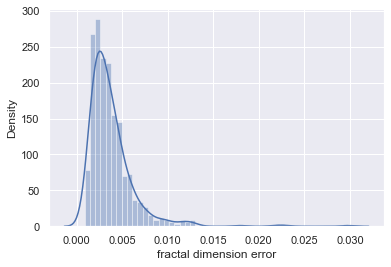

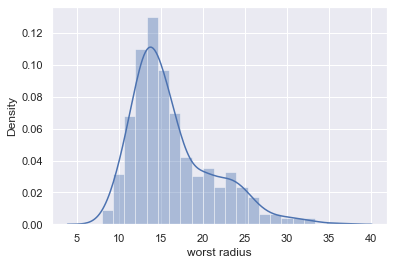

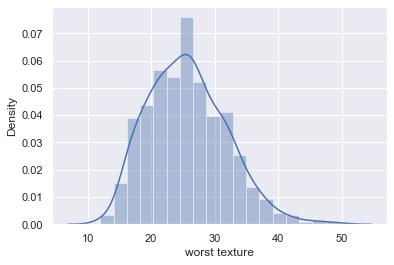

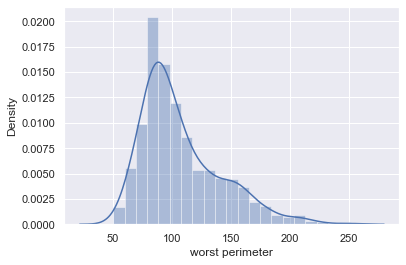

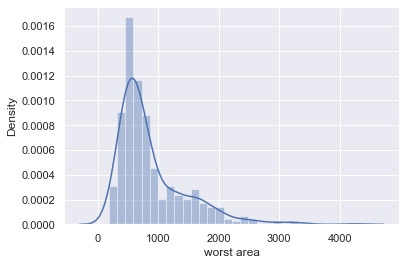

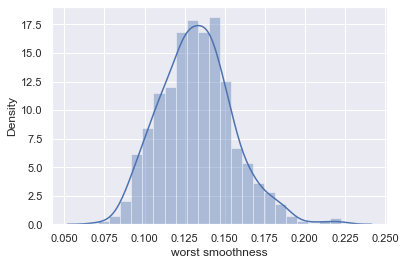

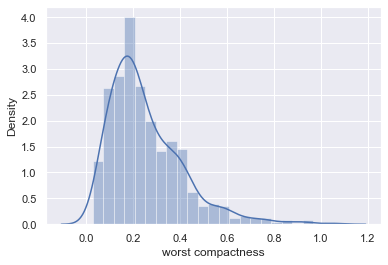

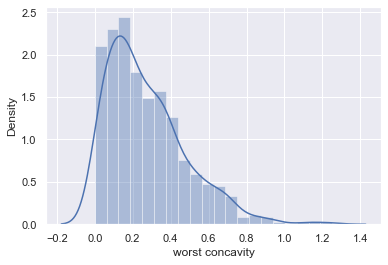

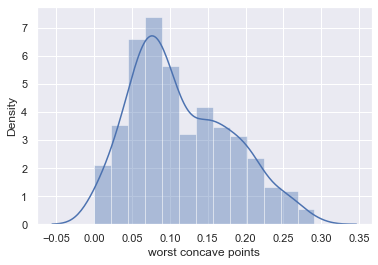

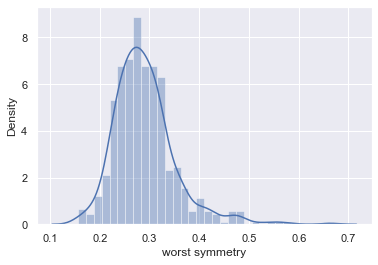

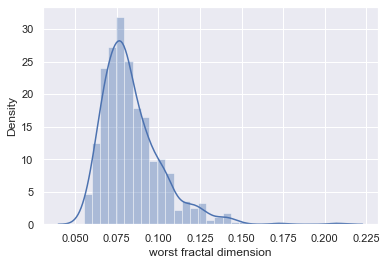

In [7]:
sns.set_theme()

for feature in breast_cancer_dataset_features:
    ax = sns.distplot(df[feature])
    plt.show()

We can see from the disitribution plots for the 30 features that a lot of them are quite skewed, meaning that there are outliers that we need to handle. Let's first split our data into a train and test set and then we will apply Standardization on the feature values to standardize them.

In [8]:
# Split data into test and train sets
X = pd.DataFrame(breast_cancer_dataset_data, columns=breast_cancer_dataset_features)
Y = pd.DataFrame(breast_cancer_dataset_labels)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Step 2: Preprocess data

In [9]:
# Apply stardardization onto our training dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)
X_train_transformed

array([[-0.01330339,  1.7757658 , -0.01491962, ..., -0.13236958,
        -1.08014517, -0.03527943],
       [-0.8448276 , -0.6284278 , -0.87702746, ..., -1.11552632,
        -0.85773964, -0.72098905],
       [ 1.44755936,  0.71180168,  1.47428816, ...,  0.87583964,
         0.4967602 ,  0.46321706],
       ...,
       [-0.46608541, -1.49375484, -0.53234924, ..., -1.32388956,
        -1.02997851, -0.75145272],
       [-0.50025764, -1.62161319, -0.527814  , ..., -0.0987626 ,
         0.35796577, -0.43906159],
       [ 0.96060511,  1.21181916,  1.00427242, ...,  0.8956983 ,
        -1.23064515,  0.50697397]])

### Step 3: Train model

#### 1. Logistic Regression

In [10]:
lr = LogisticRegression()

lr.fit(X_train_transformed, Y_train)

LogisticRegression()

In [11]:
predLR = lr.predict(X_train_transformed) 
lrAccuracy_train = accuracy_score(Y_train, predLR)
print(lrAccuracy_train)

0.989010989010989


The accuracy for our training data is pretty high. Let's test it on the test data.

In [12]:
predLR_test = lr.predict(X_test_transformed)
lrAccuracy_test = accuracy_score(Y_test, predLR_test)
print(lrAccuracy_test)

0.9736842105263158


The accuracy score for the test set is also quite high. 

#### 2. Neural Network

In [13]:
# importing tensorflow and Keras
import tensorflow as tf 
from tensorflow import keras

In [15]:
# setting up the layers of Neural Network
model = keras.models.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

# compile the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# training NN
history = model.fit(X_train_transformed, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 32ms/step - loss: 0.8862 - accuracy: 0.3570 - val_loss: 0.6593 - val_accuracy: 0.5870
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6140 - accuracy: 0.6430 - val_loss: 0.4514 - val_accuracy: 0.8913
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.4495 - accuracy: 0.8435 - val_loss: 0.3405 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.3521 - accuracy: 0.8998 - val_loss: 0.2738 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2913 - accuracy: 0.9193 - val_loss: 0.2297 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2512 - accuracy: 0.9291 - val_loss: 0.1994 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2201 - accuracy: 0.9389 - val_loss: 0.1773 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

Text(0.5, 0, 'Number of epochs')

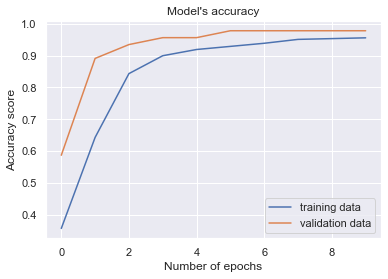

In [18]:
# let's see how our model works with the training and validation data

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training data', 'validation data'], loc = 'lower right')

plt.title("Model's accuracy")
plt.ylabel('Accuracy score')
plt.xlabel('Number of epochs')

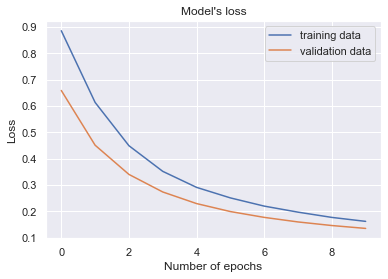

In [19]:
# Let's visualize how our loss function decreases with every epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model's loss")
plt.ylabel('Loss')
plt.xlabel('Number of epochs')

plt.legend(['training data', 'validation data'], loc = 'upper right')

#### It's time to examine the accuracy score of our NN model

In [20]:
NN_loss, NN_accuracy = model.evaluate(X_test_transformed, Y_test)
print("Neural network model's accuracy is: ", NN_accuracy)

4/4 [==============================] - 0s 0s/step - loss: 0.1587 - accuracy: 0.9474
Neural network model's accuracy is:  0.9473684430122375


In [21]:
preds_NN = model.predict(X_test_transformed)
preds_NN

array([[0.50357574, 0.6968642 ],
       [0.5714192 , 0.67098653],
       [0.24379969, 0.9554313 ],
       [0.9943329 , 0.03604388],
       [0.557595  , 0.5253793 ],
       [0.9464631 , 0.14375374],
       [0.35806346, 0.60950726],
       [0.30537936, 0.9754796 ],
       [0.3970902 , 0.877265  ],
       [0.50571436, 0.9218764 ],
       [0.56611246, 0.71340656],
       [0.30937088, 0.91248167],
       [0.51396525, 0.62160164],
       [0.45705265, 0.81965005],
       [0.38146   , 0.8525822 ],
       [0.92013156, 0.4536969 ],
       [0.36635906, 0.9577851 ],
       [0.22887203, 0.8860541 ],
       [0.44366434, 0.70755917],
       [0.9085786 , 0.1307202 ],
       [0.08533305, 0.31890982],
       [0.2368936 , 0.9612123 ],
       [0.30052084, 0.9392134 ],
       [0.35730132, 0.9668391 ],
       [0.4743399 , 0.7151639 ],
       [0.89737046, 0.27435398],
       [0.30062035, 0.90349746],
       [0.48194253, 0.7229852 ],
       [0.86423373, 0.40123796],
       [0.88858116, 0.31165004],
       [0.

Here, our model outputs for each test data point a list of 2 probabilities: the first one is the probability of the data point belongs to class 0 and the second one is for class 1. Let's transform this format of output into our labels 0 and 1. The way to do this is we assign the data point to the class that has the higher probability in the prediction.     

In [22]:
# converting the prediction probability to class labels

# argmax returns the maximum number in a list
preds_NN_labels = [np.argmax(row) for row in preds_NN]
print(preds_NN_labels)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
